In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sps
import plotly.express as px

In [ ]:
df=pd.read_csv('/content/Airbnb_Open_Data.csv',low_memory=False)

In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966,193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142,28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620,124,3.0,0.0,NaN,NaN,5.0,1.0,352.0
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,2005.0,368,74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204,41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74249 entries, 0 to 91018
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              74249 non-null  object        
 1   NAME                            74249 non-null  object        
 2   host id                         74249 non-null  object        
 3   host_identity_verified          74249 non-null  object        
 4   host name                       74249 non-null  object        
 5   neighbourhood group             74249 non-null  object        
 6   neighbourhood                   74249 non-null  object        
 7   lat                             74249 non-null  float64       
 8   long                            74249 non-null  float64       
 9   country                         74249 non-null  object        
 10  country code                    74249 non-null  object        
 11  instant

In [ ]:
df.duplicated().value_counts()

,count
False,91020


In [ ]:
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,2010.0,580,116,4.0,167.0,24-06-2019,1.34,4.0,3.0,47.0


In [ ]:
df.drop_duplicates(inplace=True)

#removing insufficient columns
df.drop(['house rules','license'],axis=1,inplace=True)

#removing dollar signs
df['price']=df['price'].str.replace('$','',regex=False)
df['service fee']=df['service fee'].str.replace('$','',regex=False)



In [ ]:
#removing commas in price and service fee
df['price']=df['price'].str.replace(',','',regex=False)
df['service fee']=df['service fee'].str.replace(',','',regex=False)

In [ ]:
#renaming columns
df.rename(columns={'price':'price_$','service fee':'service_fee_$'},inplace=True)

#dropping records with missing vallues
df.dropna(inplace=True)

#changing data types
df['price_$']=df['price_$'].astype(float)
df['service_fee_$']=df['service_fee_$'].astype(float)
df['id']=df['id'].astype(str)
df['host id']=df['host id'].astype(str)
df['last review']=pd.to_datetime(df['last review'])
df['Construction year']=df['Construction year'].astype(int)


In [ ]:
#correcting the spelling
df.loc[df['neighbourhood group']=='brookln','neighbourhood group']='Brooklyn'

#removing outliers
df=df.drop(df[df['availability 365']>500].index)

In [ ]:
df.duplicated().value_counts()

,count
False,74248


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74248 entries, 0 to 91018
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              74248 non-null  object        
 1   NAME                            74248 non-null  object        
 2   host id                         74248 non-null  object        
 3   host_identity_verified          74248 non-null  object        
 4   host name                       74248 non-null  object        
 5   neighbourhood group             74248 non-null  object        
 6   neighbourhood                   74248 non-null  object        
 7   lat                             74248 non-null  float64       
 8   long                            74248 non-null  float64       
 9   country                         74248 non-null  object        
 10  country code                    74248 non-null  object        
 11  instant

In [ ]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,74248.000000,74248.000000,74248.000000,74248.000000,74248.000000,74248.000000,74248.000000,74248,74248.000000,74248.000000,74248.000000,74248.000000
mean,40.727500,-73.948651,2012.491784,625.431136,125.087262,7.639950,33.214322,2019-06-25 04:41:16.672772352,1.358382,3.270485,7.465938,145.922422
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687670,-73.982220,2007.000000,339.000000,68.000000,2.000000,3.000000,2018-10-22 00:00:00,0.210000,2.000000,1.000000,9.000000
50%,40.721480,-73.953900,2012.000000,624.000000,125.000000,3.000000,11.000000,2019-06-16 00:00:00,0.730000,3.000000,1.000000,112.000000
75%,40.762700,-73.931110,2017.000000,913.000000,183.000000,5.000000,39.000000,2019-07-07 00:00:00,2.000000,4.000000,2.000000,272.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056207,0.050249,5.761222,331.951910,66.394443,29.270491,53.713618,NaN,1.755591,1.288466,31.041700,133.789114


In [ ]:
property_types=df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,39797
Private room,32923
Shared room,1420
Hotel room,108


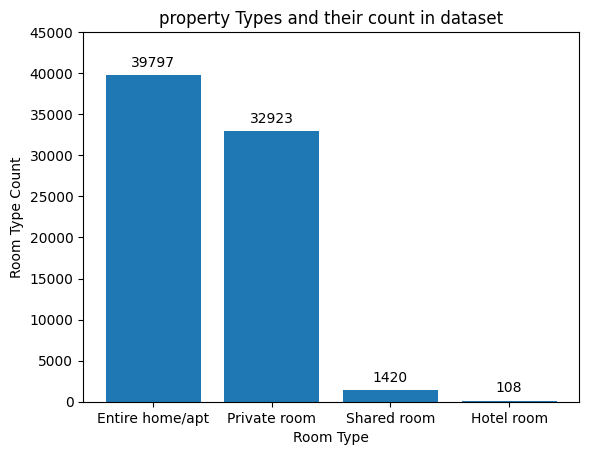

In [ ]:
room_type_bar=plt.bar(property_types.index,property_types.loc[:,"count"]);
plt.bar_label(room_type_bar,labels=property_types.loc[:,"count"],padding=4);
plt.ylim([0,45000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('property Types and their count in dataset');


In [ ]:
neigh_group=df['neighbourhood group'].value_counts().to_frame()
neigh_group

,count
neighbourhood group,
Manhattan,30962
Brooklyn,30726
Queens,9847
Bronx,2010
Staten Island,703


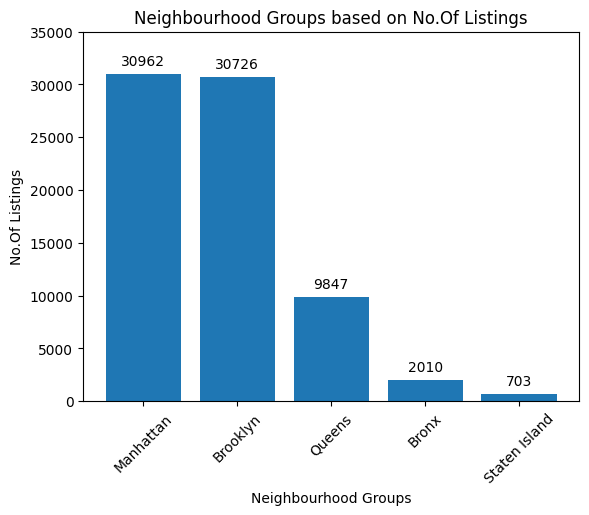

In [ ]:
neigh_group_bar=plt.bar(neigh_group.index,neigh_group.loc[:,"count"]);
plt.bar_label(neigh_group_bar,labels=neigh_group.loc[:,"count"],padding=4);
plt.ylim([0,35000]);
plt.xlabel('Neighbourhood Groups');
plt.ylabel('No.Of Listings');
plt.xticks(rotation=45);
plt.title('Neighbourhood Groups based on No.Of Listings');

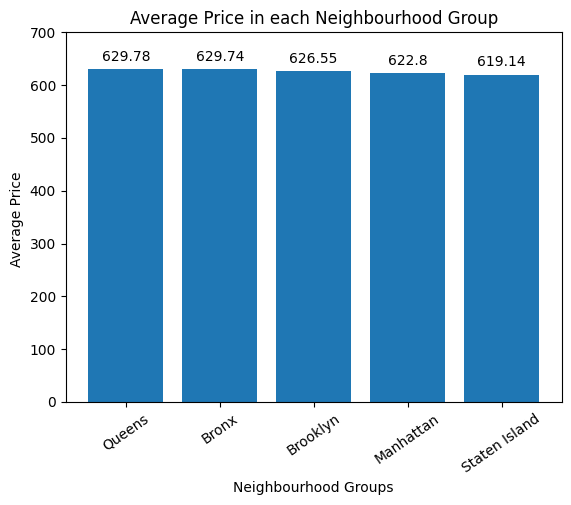

In [ ]:
avg_price=df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_price_bar=plt.bar(avg_price.index,avg_price.loc[:,"price_$"]);
plt.bar_label(avg_price_bar,labels=round(avg_price.loc[:,"price_$"],2),label_type='edge',padding=4);
plt.ylim([0,700]);
plt.xlabel('Neighbourhood Groups');
plt.ylabel('Average Price ');
plt.xticks(rotation=35);
plt.title('Average Price in each Neighbourhood Group');

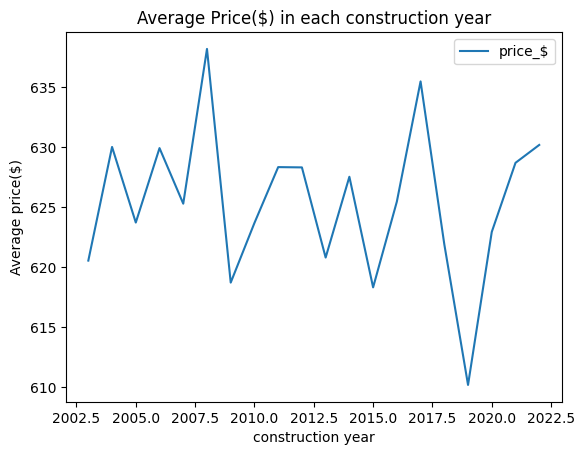

In [ ]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('construction year');
plt.ylabel('Average price($)');
plt.title('Average Price($) in each construction year');

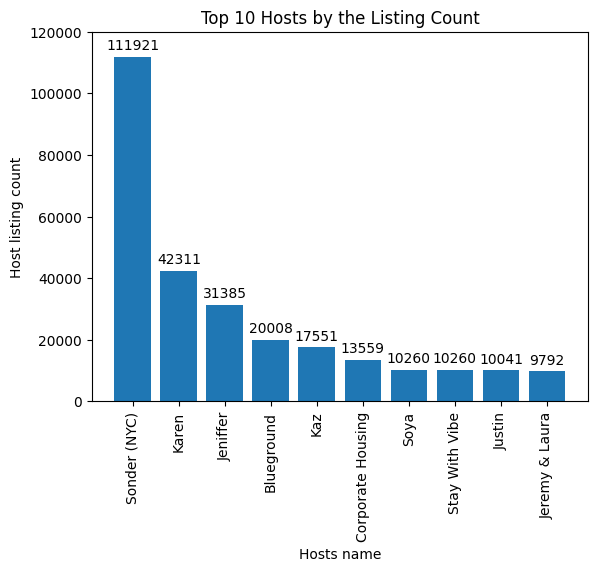

In [ ]:
hosts=df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
hosts_bar=plt.bar(hosts.index,hosts.loc[:,'calculated host listings count']);
plt.bar_label(hosts_bar,label=hosts.loc[:,'calculated host listings count'],label_type='edge',padding=3);
plt.xlabel('Hosts name');
plt.ylabel('Host listing count');
plt.xticks(rotation=90);
plt.ylim([0,120000]);
plt.title('Top 10 Hosts by the Listing Count');


In [ ]:
review=df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.273923
unconfirmed,3.267037


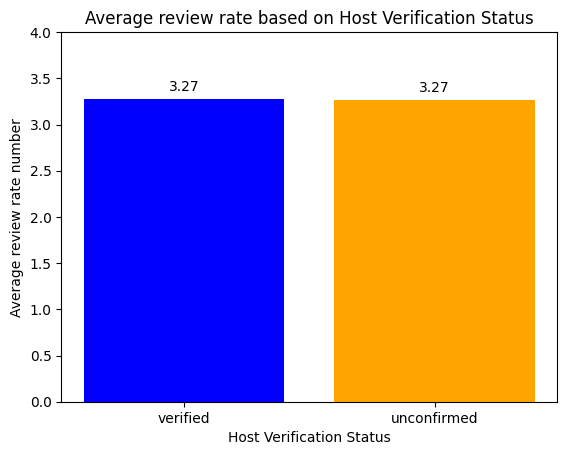

In [65]:
review_bar=plt.bar(review.index,review.loc[:,"review rate number"],color=["blue","orange"]);
plt.bar_label(review_bar,labels=round(review.loc[:,"review rate number"],2),padding=4);
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average review rate number');
plt.title('Average review rate based on Host Verification Status');


/tmp/ipython-input-1351453663.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sps.boxplot(data=df,x="host_identity_verified",y="review rate number",palette=colors);


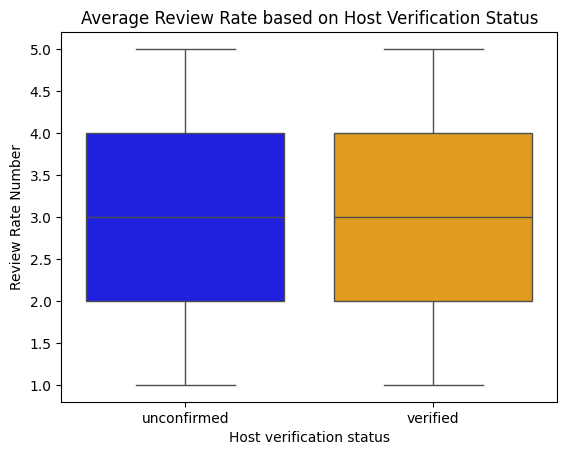

In [67]:
colors=["blue","orange"]
sps.boxplot(data=df,x="host_identity_verified",y="review rate number",palette=colors);
plt.xlabel('Host verification status');
plt.ylabel('Review Rate Number');
plt.title('Average Review Rate based on Host Verification Status');

In [ ]:
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999909273621684)

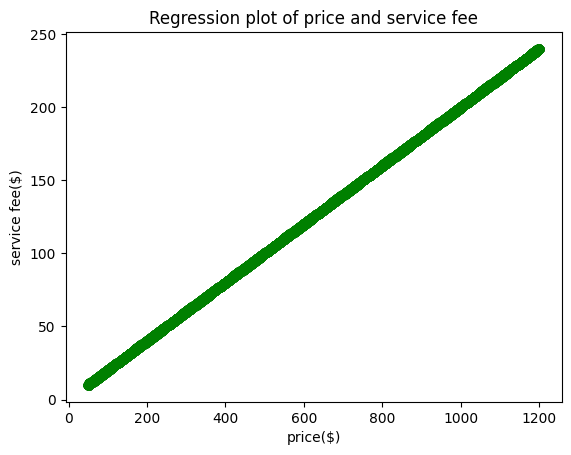

In [68]:
sps.regplot(df,x='price_$',y='service_fee_$',color='green');
plt.xlabel('price($)');
plt.ylabel('service fee($)');
plt.title('Regression plot of price and service fee');

In [ ]:
arn=df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
arn

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.397959
                    Private room               3.317158
                    Shared room                3.375000
Brooklyn            Entire home/apt            3.231757
                    Hotel room                 3.833333
                    Private room               3.264995
                    Shared room                3.307544
Manhattan           Entire home/apt            3.260586
                    Hotel room                 3.500000
                    Private room               3.275963
                    Shared room                3.244863
Queens              Entire home/apt            3.350088
                    Hotel room                 3.750000
                    Private room               3.306359
                    Shared room                3.301653
Staten Island       Entire home/apt            3.320652
                    Private room               3.503030
                    Shared room                3.600000

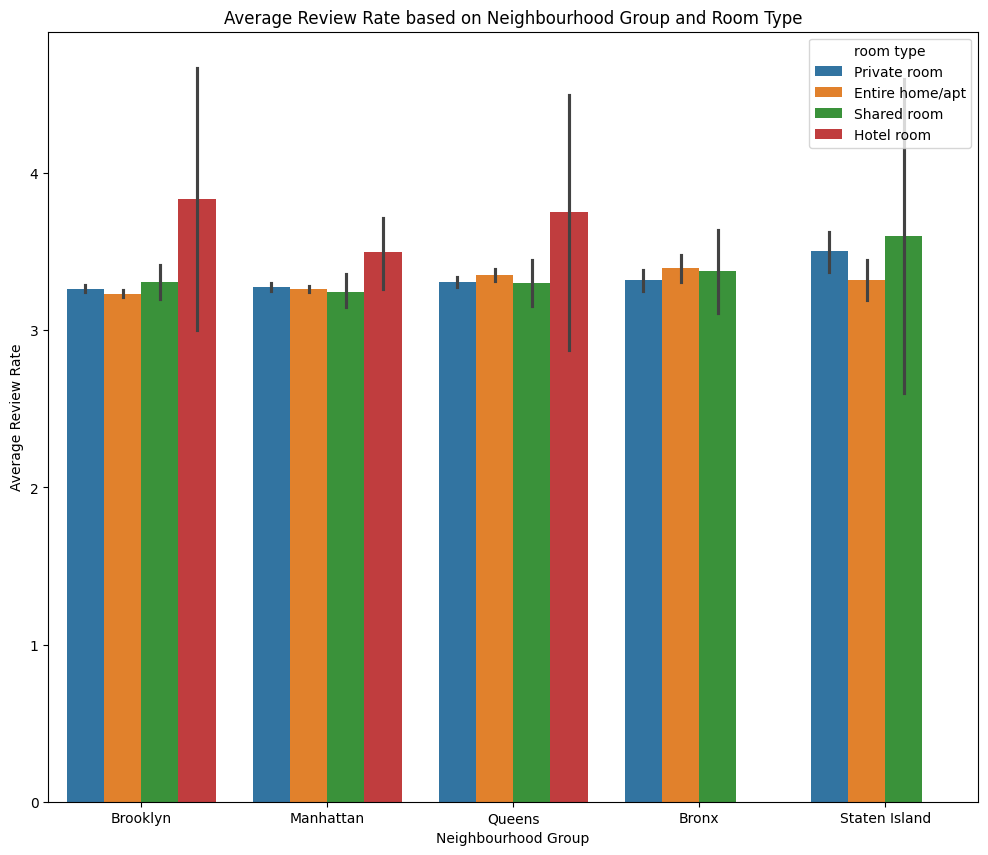

In [ ]:
plt.figure(figsize=[12,10]);
sps.barplot(data=df,x='neighbourhood group',y='review rate number',hue='room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate based on Neighbourhood Group and Room Type');

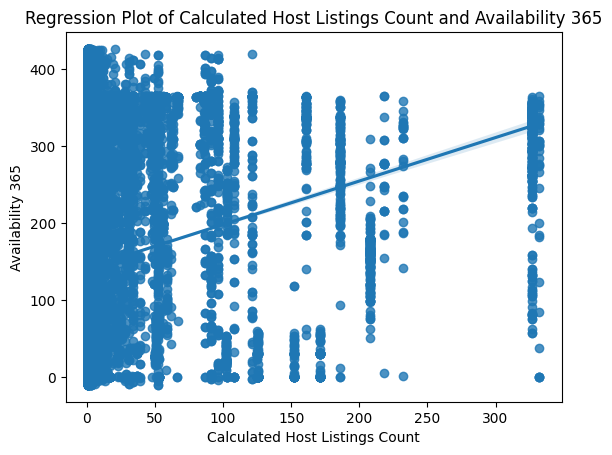

In [ ]:
sps.regplot(df,x='calculated host listings count',y='availability 365');
plt.xlabel('Calculated Host Listings Count');
plt.ylabel('Availability 365');
plt.title('Regression Plot of Calculated Host Listings Count and Availability 365');

In [ ]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.1309079511260425)